<a href="https://colab.research.google.com/github/ishwarraja/SOAI-ERAV2/blob/main/S5/S5_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import urllib3
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="urllib3")
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
from model import Net, model_summary, model_train, model_test

In [2]:
# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


In [7]:
# Train data transformations
train_transforms = transforms.Compose([
    transforms.RandomApply([transforms.CenterCrop(22), ], p=0.1),
    transforms.Resize((28, 28)),
    transforms.RandomRotation((-15., 15.), fill=0),
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,)),
    ])

# Test data transformations
test_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1407,), (0.4081,))
    ])



In [8]:
train_data = datasets.MNIST('../data', train=True, download=True, transform=train_transforms)
test_data = datasets.MNIST('../data', train=True, download=True, transform=train_transforms)
batch_size = 512

kwargs = {'batch_size': batch_size, 'shuffle': False, 'num_workers': 2, 'pin_memory': True}

test_loader = torch.utils.data.DataLoader(train_data, **kwargs)
train_loader = torch.utils.data.DataLoader(train_data, **kwargs)

100%|██████████| 9912422/9912422 [00:00<00:00, 308386266.16it/s]

Extracting ../data/MNIST/raw/train-images-idx3-ubyte.gz to ../data/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 42864718.27it/s]


Extracting ../data/MNIST/raw/train-labels-idx1-ubyte.gz to ../data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 107168292.14it/s]


Extracting ../data/MNIST/raw/t10k-images-idx3-ubyte.gz to ../data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 18212742.61it/s]

Extracting ../data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/MNIST/raw



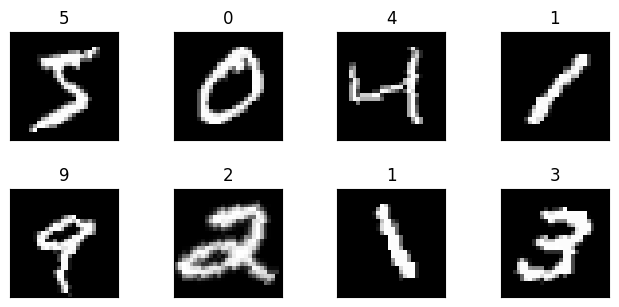

In [9]:
from utils import return_dataset_images

return_dataset_images(train_loader,8)

In [10]:
!pip install torchsummary

from tqdm import tqdm
warnings.filterwarnings("ignore", category=urllib3.exceptions.SecurityWarning)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [18]:
model = Net().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=15, gamma=0.1, verbose=True)
# New Line
# criterion = nn.CrossEntropyLoss()
criterion = F.nll_loss
num_epochs = 3

for epoch in range(1, num_epochs+1):
  print(f'Epoch {epoch}')
  # print(f"Epoch [{epoch+1}/{num_epochs}]: Train Loss: {train_losses:.3f}, Batch: {Batch_id},Train Accuracy: {train_accuracy:.2f}%, Test Accuracy: {test_accuracy:.2f}%")
  model_train(model, device, train_loader, optimizer, criterion)
  model_test(model, device, train_loader, criterion)
  scheduler.step()

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 1


Train: Loss=0.8709 Batch_id=117 Accuracy=39.06: 100%|██████████| 118/118 [00:22<00:00,  5.13it/s]


Test set: Average loss: 0.6542, Accuracy: 46907/60000 (78.18%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 2


Train: Loss=0.3404 Batch_id=117 Accuracy=91.47: 100%|██████████| 118/118 [00:22<00:00,  5.29it/s]


Test set: Average loss: 0.1561, Accuracy: 57116/60000 (95.19%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 3


Train: Loss=0.2689 Batch_id=117 Accuracy=95.83: 100%|██████████| 118/118 [00:22<00:00,  5.20it/s]


Test set: Average loss: 0.1208, Accuracy: 57746/60000 (96.24%)

Adjusting learning rate of group 0 to 1.0000e-02.


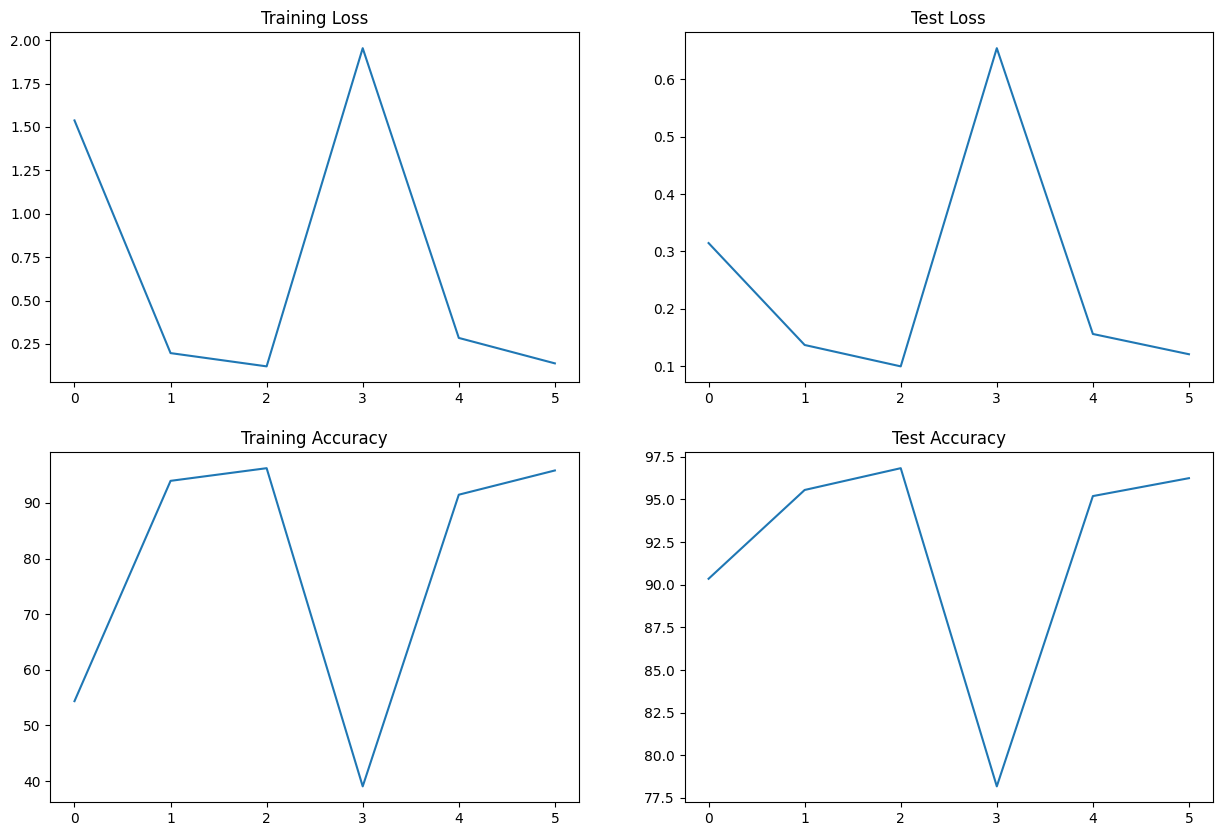

In [19]:
from model import draw_graphs

draw_graphs()